Initial shape: (768, 9)
Missing values: 29

K=3, Metric=euclidean
Confusion Matrix:
 [[85 15]
 [24 30]]
Accuracy: 0.7468, Precision: 0.6667, Recall: 0.5556, F1 Score: 0.6061

K=3, Metric=manhattan
Confusion Matrix:
 [[85 15]
 [23 31]]
Accuracy: 0.7532, Precision: 0.6739, Recall: 0.5741, F1 Score: 0.6200

K=5, Metric=euclidean
Confusion Matrix:
 [[86 14]
 [27 27]]
Accuracy: 0.7338, Precision: 0.6585, Recall: 0.5000, F1 Score: 0.5684

K=5, Metric=manhattan
Confusion Matrix:
 [[85 15]
 [24 30]]
Accuracy: 0.7468, Precision: 0.6667, Recall: 0.5556, F1 Score: 0.6061

K=7, Metric=euclidean
Confusion Matrix:
 [[85 15]
 [26 28]]
Accuracy: 0.7338, Precision: 0.6512, Recall: 0.5185, F1 Score: 0.5773

K=7, Metric=manhattan
Confusion Matrix:
 [[86 14]
 [24 30]]
Accuracy: 0.7532, Precision: 0.6818, Recall: 0.5556, F1 Score: 0.6122

K=9, Metric=euclidean
Confusion Matrix:
 [[86 14]
 [24 30]]
Accuracy: 0.7532, Precision: 0.6818, Recall: 0.5556, F1 Score: 0.6122

K=9, Metric=manhattan
Confusion Matrix:

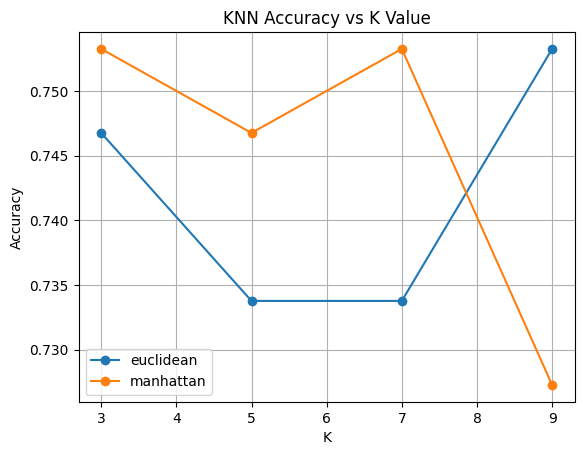


Best Accuracy: 0.7532 using K=3 and Metric=manhattan


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Load dataset
df = pd.read_csv('diabetes1.csv')
print("Initial shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())

# Step 2: Preprocessing - Fix 0s and missing values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

# Ensure 'Outcome' has no missing values
df = df.dropna(subset=['Outcome'])

# Step 3: Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Custom KNN implementation
def knn_predict(X_train, y_train, X_test, k=5, distance='euclidean'):
    preds = []
    for test_point in X_test:
        if distance == 'euclidean':
            dists = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        elif distance == 'manhattan':
            dists = np.sum(np.abs(X_train - test_point), axis=1)
        else:
            raise ValueError("Only 'euclidean' or 'manhattan' supported.")
        neighbors = y_train[np.argsort(dists)[:k]]
        vote = Counter(neighbors).most_common(1)[0][0]
        preds.append(vote)
    return np.array(preds)

# Step 6: Try different K and distance metrics
results = []
for k in [3, 5, 7, 9]:
    for metric in ['euclidean', 'manhattan']:
        y_pred = knn_predict(X_train, y_train, X_test, k=k, distance=metric)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append({'K': k, 'Metric': metric, 'Accuracy': acc,
                        'Precision': prec, 'Recall': rec, 'F1': f1})
        print(f"\nK={k}, Metric={metric}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

# Step 7: Plot accuracy vs k
df_result = pd.DataFrame(results)
for metric in ['euclidean', 'manhattan']:
    subset = df_result[df_result['Metric'] == metric]
    plt.plot(subset['K'], subset['Accuracy'], marker='o', label=f'{metric}')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Best setting
best = df_result.sort_values(by='Accuracy', ascending=False).iloc[0]
print(f"\nBest Accuracy: {best['Accuracy']:.4f} using K={best['K']} and Metric={best['Metric']}")